In [2]:
#Using A Decision Tree Algorithm For Diabetes Prediction.

#Attributes:

#No_preg   –   Number of times pregnant
#glucose   –   Plasma glucose concentration
#Blood_P   –   Blood pressure
#Skin_thic –   Triceps skinfold thickness
#Insulin   -   Insulin
#BMI       –   Body mass index
#ped       –   Diabetes pedigree function
#age       –   Age
#Result    –   Result

In [3]:
#Importing required librareis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#Loading the dataset

df=pd.read_csv('/content/diabetes.csv' ,sep=',' ,header=0)


In [5]:
df.head()

,No_preg,Glucose,Blood_P,Skin_thic,Insulin,BMI,Diabetes_PF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,No_preg,Glucose,Blood_P,Skin_thic,Insulin,BMI,Diabetes_PF,Age,Result
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_preg       768 non-null    int64  
 1   Glucose       768 non-null    int64  
 2   Blood_P       768 non-null    int64  
 3   Skin_thic     768 non-null    int64  
 4   Insulin       768 non-null    int64  
 5   BMI           768 non-null    float64
 6   Diabetes_PF   768 non-null    float64
 7   Age           768 non-null    int64  
 8   Result        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Total people with No Diabetes
No_Diabetes=0
outcome=df['Result']
for i in range(len(outcome)):
 if outcome[i]==0:
  #print(outcome[i])
  No_Diabetes=No_Diabetes+1
print('Total people with No Diabetes:',No_Diabetes)   

Total people with No Diabetes: 500


In [9]:
#Total people with Diabetes
Diabetes=0
outcome=df["Result"]
for i in range(len(outcome)):
 if outcome[i]==1:
  #print(outcome[i])
   Diabetes=Diabetes+1
print('Total people with Diabetes:',Diabetes)   

Total people with Diabetes: 268


Text(0.5, 1.0, 'No Diabetes Vs Diabetes')

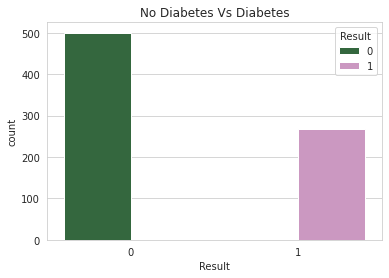

In [10]:
#No Diabetes Vs Diabetes plot
sns.set_style('whitegrid')
sns.countplot(x='Result',hue='Result',data=df,palette='cubehelix')
plt.title ('No Diabetes Vs Diabetes')

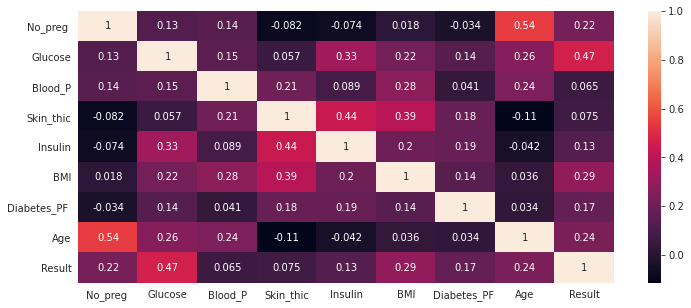

In [11]:
#Correlation plot
plt.figure(figsize = (12,5))
sns.heatmap(df.corr()  ,annot = True)

In [12]:
df.loc[df['Result'] == 0, 'Result'] = 'No'
df.loc[df['Result'] == 1, 'Result'] = 'Yes'
df

,No_preg,Glucose,Blood_P,Skin_thic,Insulin,BMI,Diabetes_PF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


In [13]:
df.describe()

,No_preg,Glucose,Blood_P,Skin_thic,Insulin,BMI,Diabetes_PF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
#Seperating the target variables
X=df.drop(["Result"],axis=1)
y=df[["Result"]] 


In [26]:
#Spliting the dataset into test and train 
X_train, X_test, y_train, y_test=train_test_split(X,y,  test_size=0.35)



In [28]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#y_pred=model.predict([[8,	183	,64	,0,	0	,23.3,	0.672,	32	]])
#y_pred

array(['Yes'], dtype=object)

In [29]:
y_pred=model.predict(X_test)
y_pred


array(['No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', '

In [30]:
#Checking Accuracy
print('Accuracy Score' , accuracy_score( y_test,y_pred)*100 ,'%')

Accuracy Score 71.00371747211895 %
